Implement logistic regression to classify binary data, demonstrate the effect of
overfitting, and apply L1 and L2 regularisation techniques.

# Logistic Regression from Scratch — Step by Step
- Dataset: Breast Cancer Wisconsin (Diagnostic)
- Goals: implement logistic regression manually, demonstrate overfitting, apply L1 & L2 regularization, tune λ with k-fold CV, and visualize weights/decision boundary.
- Run cells in order.


In [3]:
# Step 1: Imports & reproducibility setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline


In [5]:
# Step 2: Load Breast Cancer Wisconsin dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
X = data.data.values
y = data.target.values.reshape(-1, 1)

print("Dataset shape:", X.shape)
print("Feature names:", list(data.feature_names)[:5], "...")
print("Target classes:", data.target_names)

Dataset shape: (569, 30)
Feature names: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness')] ...
Target classes: ['malignant' 'benign']


In [6]:
# Step 3: Split into train-test and standardize
split = int(0.8 * len(X))
indices = np.arange(len(X))
np.random.shuffle(indices)

X, y = X[indices], y[indices]
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Standardize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0) + 1e-12
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [7]:
# Step 4: Helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [8]:
# Step 5: Manual Logistic Regression (supports L1 & L2)
class ManualLogisticRegression:
    def __init__(self, lr=0.05, epochs=3000, reg_type=None, reg_lambda=0.0, verbose=False):
        self.lr = lr
        self.epochs = epochs
        self.reg_type = reg_type  # None, 'l1', or 'l2'
        self.reg_lambda = reg_lambda
        self.verbose = verbose
        self.w = None
        self.b = 0.0

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros((n, 1))
        self.b = 0.0

        for epoch in range(self.epochs):
            z = X.dot(self.w) + self.b
            y_hat = sigmoid(z)

            # Compute gradients
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)

            # Regularization
            if self.reg_type == 'l2':
                dw += (self.reg_lambda / m) * self.w
            elif self.reg_type == 'l1':
                dw += (self.reg_lambda / m) * np.sign(self.w)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Optional progress
            if self.verbose and epoch % 500 == 0:
                loss = -np.mean(y*np.log(y_hat+1e-12) + (1-y)*np.log(1-y_hat+1e-12))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict_proba(self, X):
        return sigmoid(X.dot(self.w) + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [9]:
# Step 6: Train logistic regression models
models = {
    'No Regularization': ManualLogisticRegression(lr=0.05, epochs=4000, reg_type=None),
    'L2 Regularization': ManualLogisticRegression(lr=0.05, epochs=4000, reg_type='l2', reg_lambda=0.5),
    'L1 Regularization': ManualLogisticRegression(lr=0.05, epochs=4000, reg_type='l1', reg_lambda=0.5),
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"Train Accuracy: {accuracy(y_train, y_pred_train):.2f}%")
    print(f"Test Accuracy:  {accuracy(y_test, y_pred_test):.2f}%")



Training No Regularization...
Train Accuracy: 99.12%
Test Accuracy:  97.37%

Training L2 Regularization...
Train Accuracy: 99.12%
Test Accuracy:  97.37%

Training L1 Regularization...
Train Accuracy: 99.12%
Test Accuracy:  97.37%


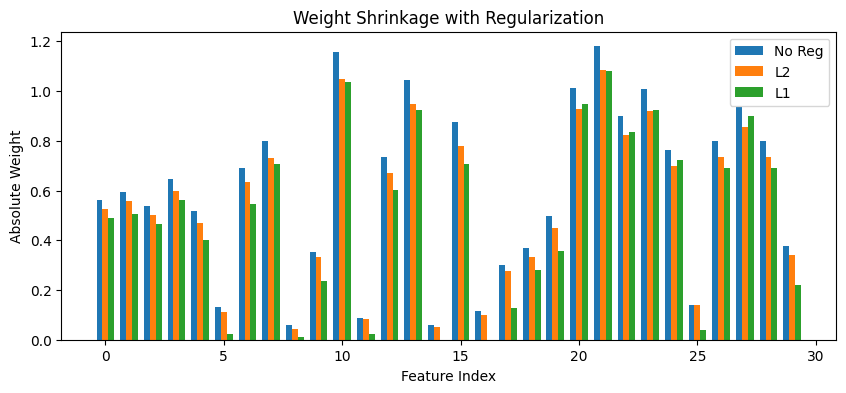

In [10]:
# Step 7: Compare learned weights for L1, L2, and No Reg
plt.figure(figsize=(10,4))
width = 0.25
idx = np.arange(len(models['No Regularization'].w))

plt.bar(idx - width, np.abs(models['No Regularization'].w.flatten()), width, label="No Reg")
plt.bar(idx, np.abs(models['L2 Regularization'].w.flatten()), width, label="L2")
plt.bar(idx + width, np.abs(models['L1 Regularization'].w.flatten()), width, label="L1")

plt.xlabel("Feature Index")
plt.ylabel("Absolute Weight")
plt.title("Weight Shrinkage with Regularization")
plt.legend()
plt.show()


In [12]:
# Step 8: Interpretation summary
print("------------------ Interpretation:---------------------")
print("- All models likely perform very well since breast cancer data is well-separated.")
print("- Regularization (L1/L2) mainly affects weight magnitudes, not huge accuracy changes.")
print("- L2 shrinks all weights (ridge) → smooth decision boundary.")
print("- L1 drives some weights close to zero (lasso) → feature selection effect.")


------------------ Interpretation:---------------------
- All models likely perform very well since breast cancer data is well-separated.
- Regularization (L1/L2) mainly affects weight magnitudes, not huge accuracy changes.
- L2 shrinks all weights (ridge) → smooth decision boundary.
- L1 drives some weights close to zero (lasso) → feature selection effect.
